#                              `WEBSITE STATISTICS PROJECT`

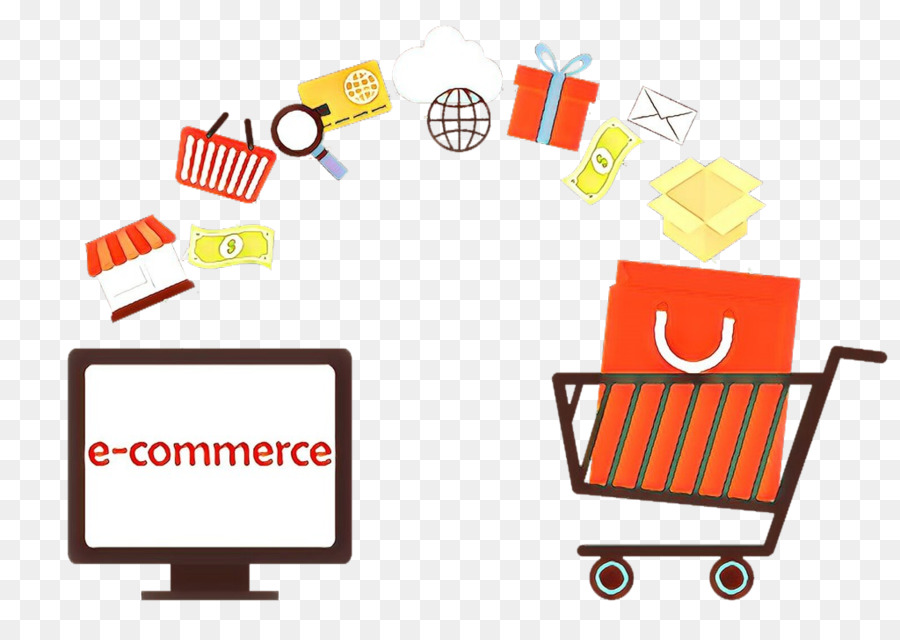

# `BACKGROUND OF THE PROJECT`

**_In the dynamic landscape of e-commerce, understanding user behavior and website performance is crucial for optimizing conversions and maximizing revenue. The provided dataset offers a comprehensive view of user interactions on an e-commerce website, encompassing various dimensions such as page visits, session durations, traffic sources, and purchase behavior._**

# `OBJECTIVE OF THE PROJECT`

**_The objective of this project is to leverage the dataset to analyze website statistics and derive actionable insights aimed at enhancing the e-commerce platform's performance and maximizing revenue generation. By examining user engagement metrics, traffic patterns, and transactional data, the goal is to identify areas of improvement and formulate strategic recommendations for optimization._**

## `COLUMN DESCRIPTION:`

**Administrative:** This is the number of pages of this type (administrative) that the user visited.

**Administrative_Duration:** This is the amount of time spent in this category of pages.

**Informational:** This is the number of pages of this type (informational) that the user visited.

**Informational_Duration:** This is the amount of time spent in this category of pages.

**ProductRelated:** This is the number of pages of this type (product related) that the user visited.

**ProductRelated_Duration:** This is the amount of time spent in this category of pages.

**BounceRates:** The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.

**ExitRates:** The percentage of pageviews on the website that end at that specific page.

**PageValues:** The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction.

**SpecialDay:** This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in which the transaction is more likely to be finalized. More information about how this value is calculated below.

**Month:** Contains the month the pageview occurred, in string form.

**OperatingSystems:** An integer value representing the operating system that the user was on when viewing the page.

**Browser:** An integer value representing the browser that the user was using to view the page.

**Region:** An integer value representing which region the user is located in.

**TrafficType:** An integer value representing what type of traffic the user is categorized into.

**VisitorType:** A string representing whether a visitor is New Visitor, Returning Visitor, or Other.

**Weekend:** A boolean representing whether the session is on a weekend.

**Revenue:** A boolean representing whether or not the user completed the purchase.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
plt.style.use('fivethirtyeight') 

In [2]:
df = pd.read_csv('shopping.csv')

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
print('Shape of the dataset:',df.shape)
print('--'*40)
print('Duplicated rows in the dataset:',df.duplicated().sum())
print('--'*40)
print('Total NaN values in the dataset:',df.isna().sum().sum())
print('--'*40)
print('Columns in the dataset:',df.columns)
print('--'*40)

Shape of the dataset: (12330, 18)
--------------------------------------------------------------------------------
Duplicated rows in the dataset: 125
--------------------------------------------------------------------------------
Total NaN values in the dataset: 0
--------------------------------------------------------------------------------
Columns in the dataset: Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')
--------------------------------------------------------------------------------


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
df.nunique()

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

In [7]:
for i in df.columns:
    print(df[i])
    print(df[i].value_counts())

0        0
1        0
2        0
3        0
4        0
        ..
12325    3
12326    0
12327    0
12328    4
12329    0
Name: Administrative, Length: 12330, dtype: int64
0     5768
1     1354
2     1114
3      915
4      765
5      575
6      432
7      338
8      287
9      225
10     153
11     105
12      86
13      56
14      44
15      38
16      24
17      16
18      12
19       6
24       4
22       4
23       3
21       2
20       2
27       1
26       1
Name: Administrative, dtype: int64
0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
         ...  
12325    145.0
12326      0.0
12327      0.0
12328     75.0
12329      0.0
Name: Administrative_Duration, Length: 12330, dtype: float64
0.000000      5903
4.000000        56
5.000000        53
7.000000        45
11.000000       42
              ... 
68.014286        1
362.300000       1
90.700000        1
760.900000       1
150.357143       1
Name: Administrative_Duration, Length: 3335, dtype: int64
0   

In [8]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


**`Observations:`**

- The dataset contains no null values, but there are 125 duplicate entries.
- Out of the 21 columns, several are numerical but contain categorical data, which can be adjusted during data preprocessing.
- Significant outliers are present in the PageValues, Administrative_Duration, Informational_Duration, and ProductRelated_Duration columns, indicating that users may have spent considerable time exploring products, which is valuable for understanding user purchasing behavior.

# `PRE-PROCESSING AND FEATURE ENGINEERING`

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df['Visited_All_Three'] = ((df['Administrative'] > 0) & 
                           (df['Informational'] > 0) & 
                           (df['ProductRelated'] > 0)).astype('int64')

In [11]:
df['Session_Length'] = df['Administrative_Duration'] + df['Informational_Duration'] + df['ProductRelated_Duration']

In [12]:
cols = ['SpecialDay','OperatingSystems','Browser','Region','TrafficType']
for i in cols:
    df[i] = df[i].astype('category')

In [13]:
df.nunique().T

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
Visited_All_Three             2
Session_Length             9749
dtype: int64

In [14]:
df.dtypes

Administrative                int64
Administrative_Duration     float64
Informational                 int64
Informational_Duration      float64
ProductRelated                int64
ProductRelated_Duration     float64
BounceRates                 float64
ExitRates                   float64
PageValues                  float64
SpecialDay                 category
Month                        object
OperatingSystems           category
Browser                    category
Region                     category
TrafficType                category
VisitorType                  object
Weekend                        bool
Revenue                        bool
Visited_All_Three             int64
Session_Length              float64
dtype: object

# `DATA VISUALIZATION- UNIVARIATE ANALYSIS`

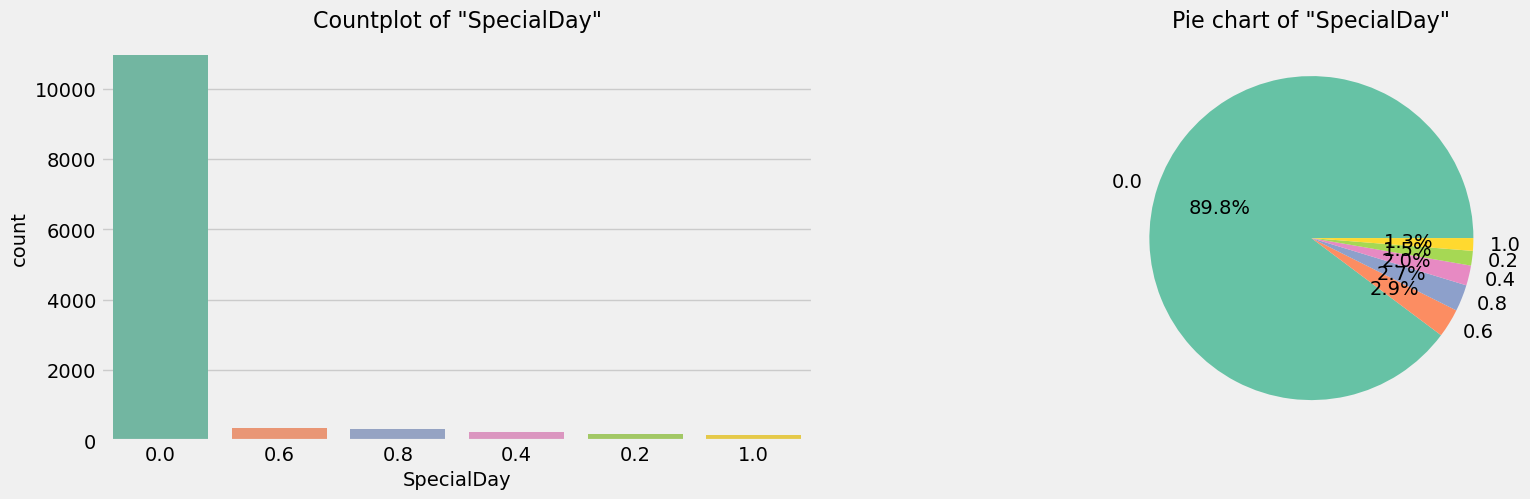

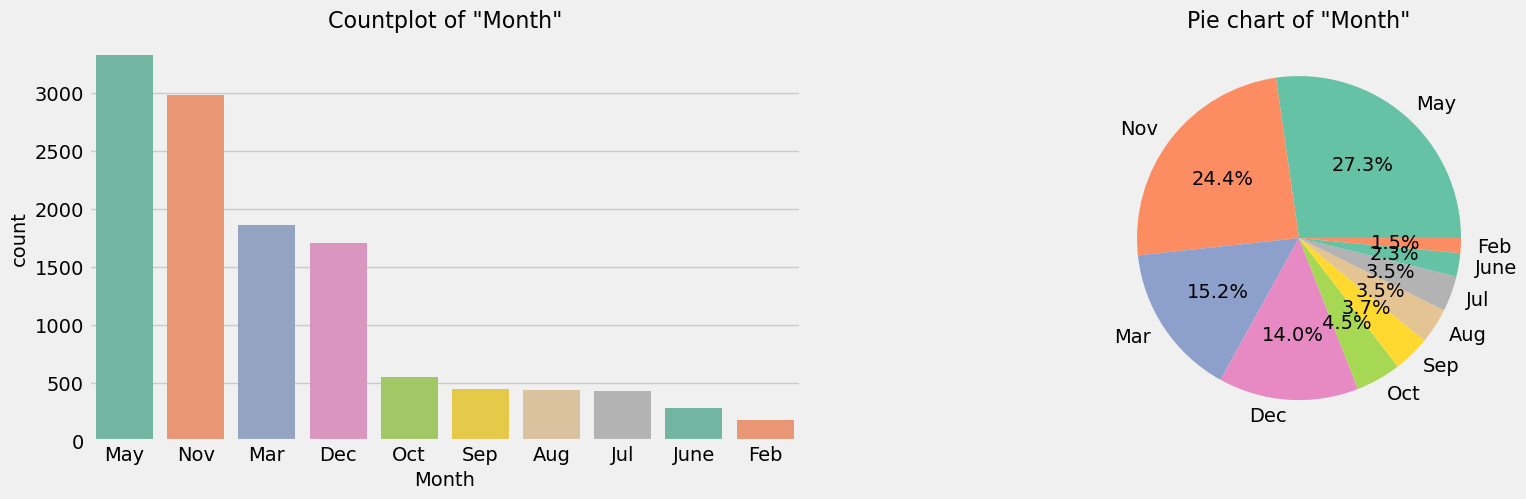

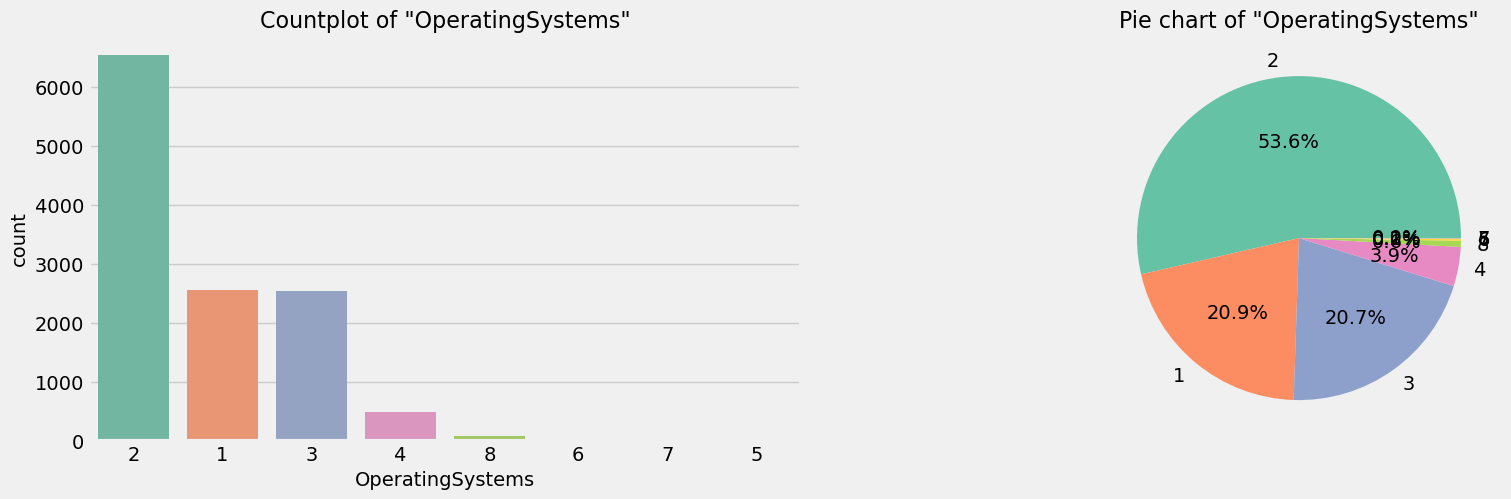

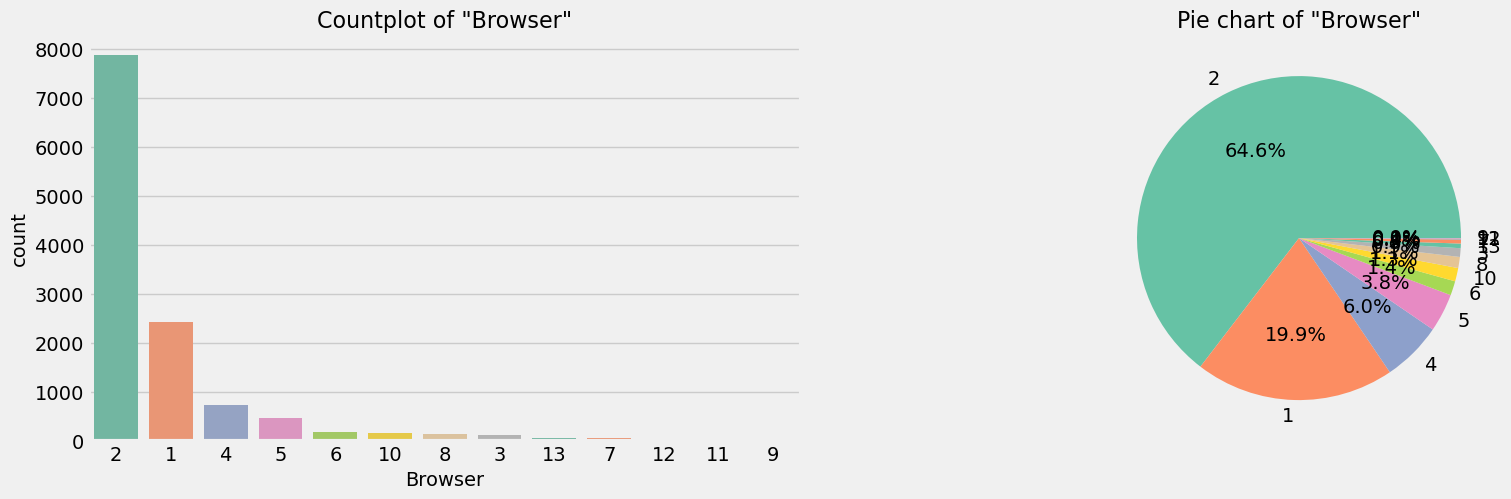

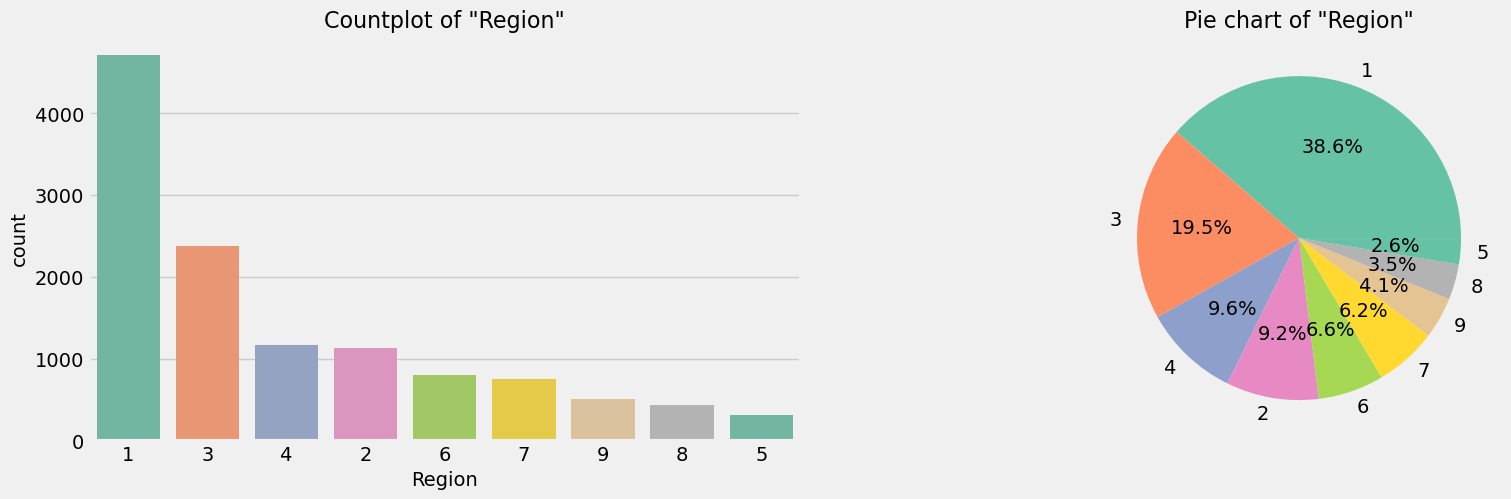

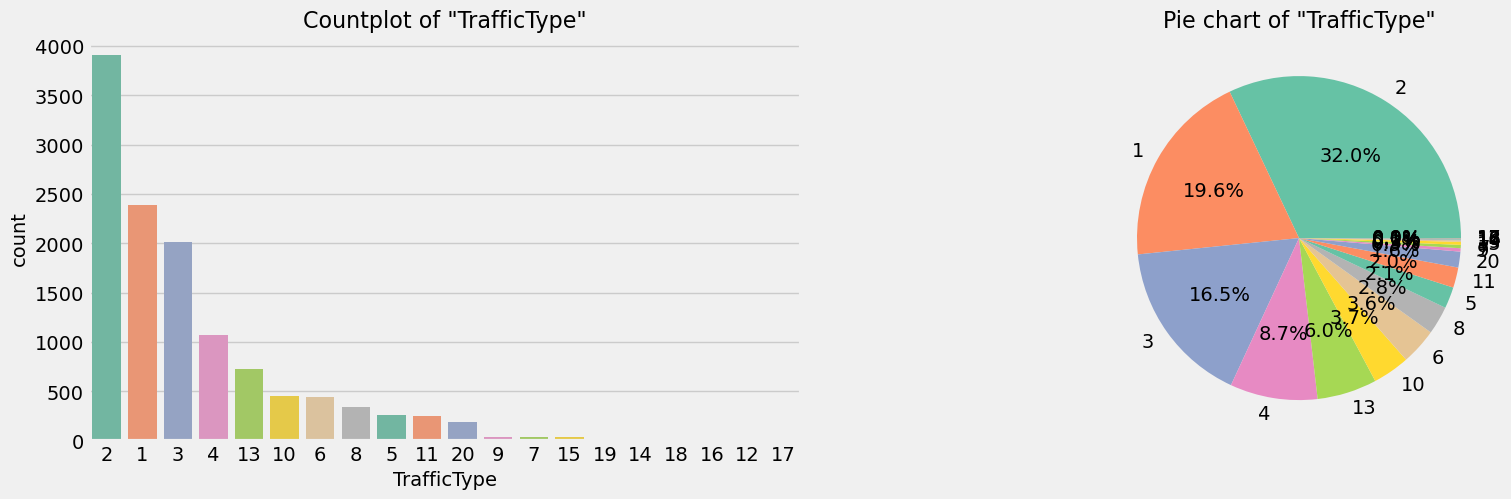

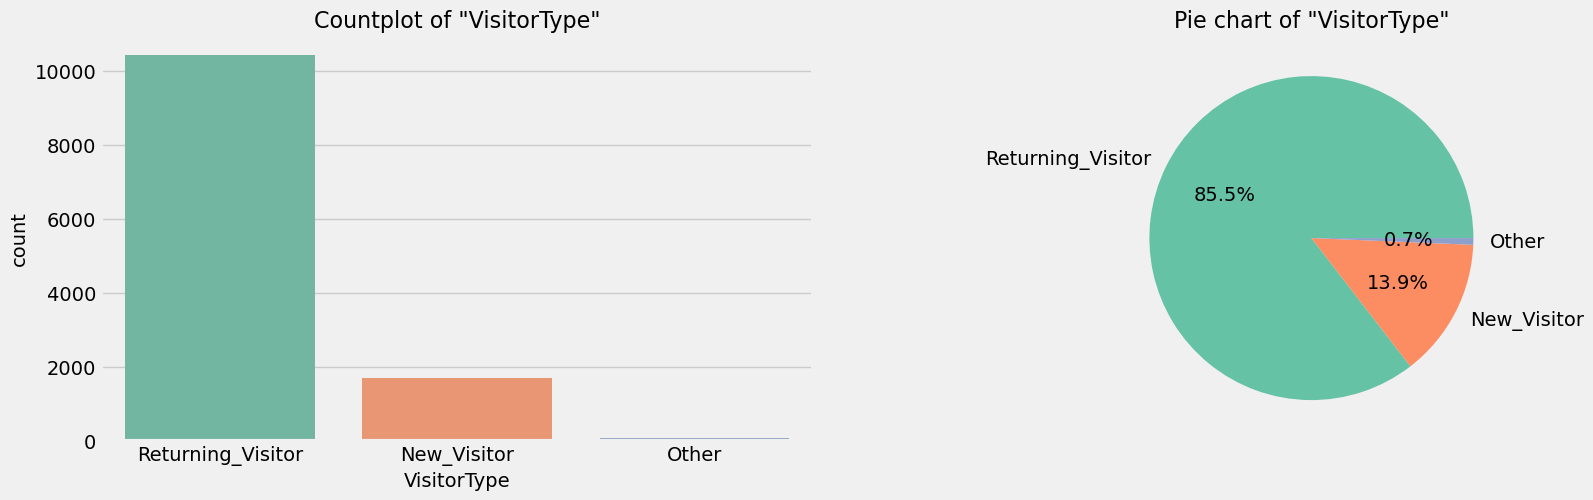

In [15]:
cols = df.select_dtypes(['object','category'])

for i in cols:
    plt.figure(figsize=(18, 5))

    plt.subplot(1, 2, 1)
    sns.countplot(x=i, data=df, palette='Set2',order=df[i].value_counts().index)
    plt.title(f'Countplot of "{i}"', fontsize=16)

    plt.subplot(1, 2, 2)
    counts = df[i].value_counts()
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
    plt.title(f'Pie chart of "{i}"', fontsize=16)

    plt.show()

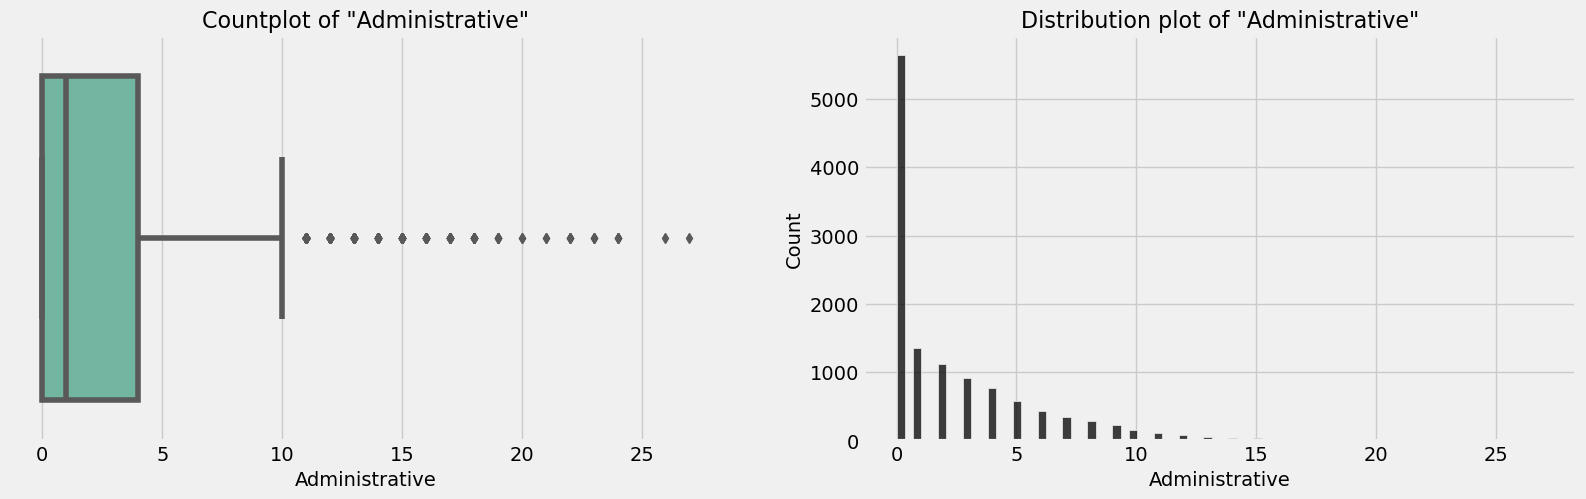

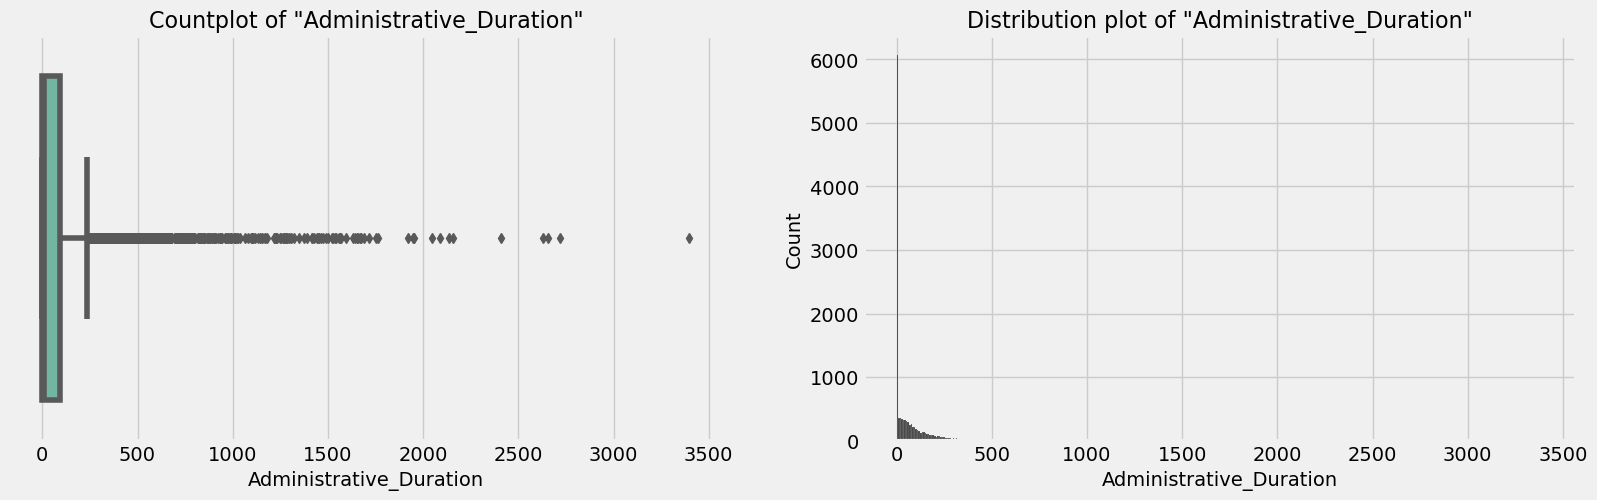

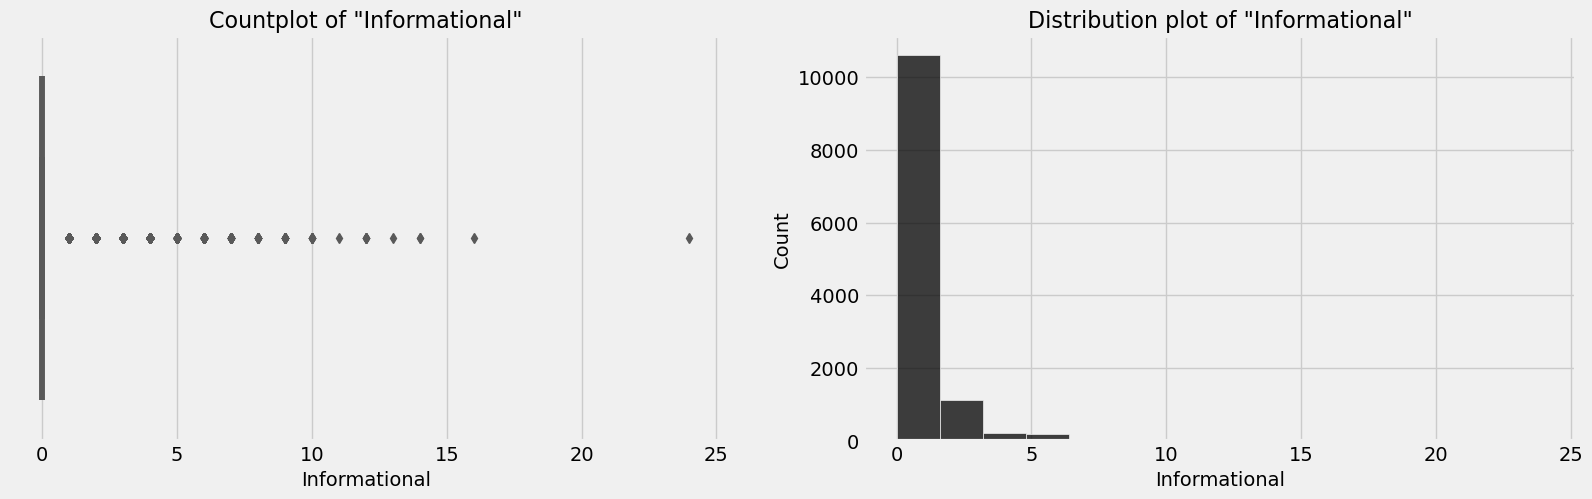

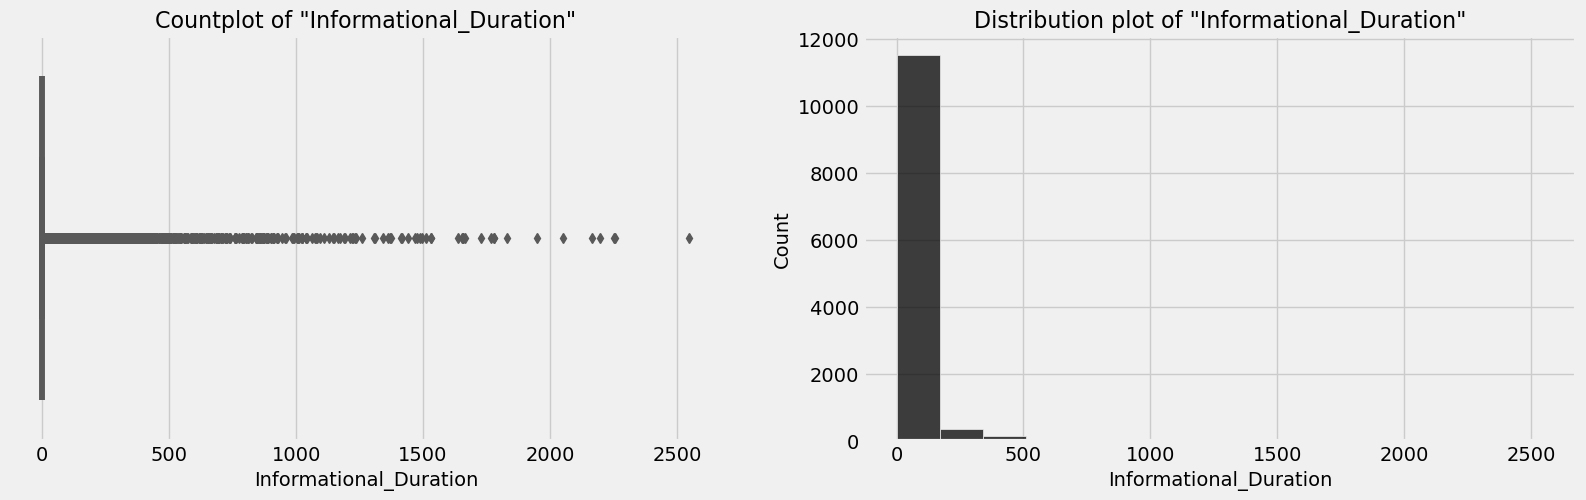

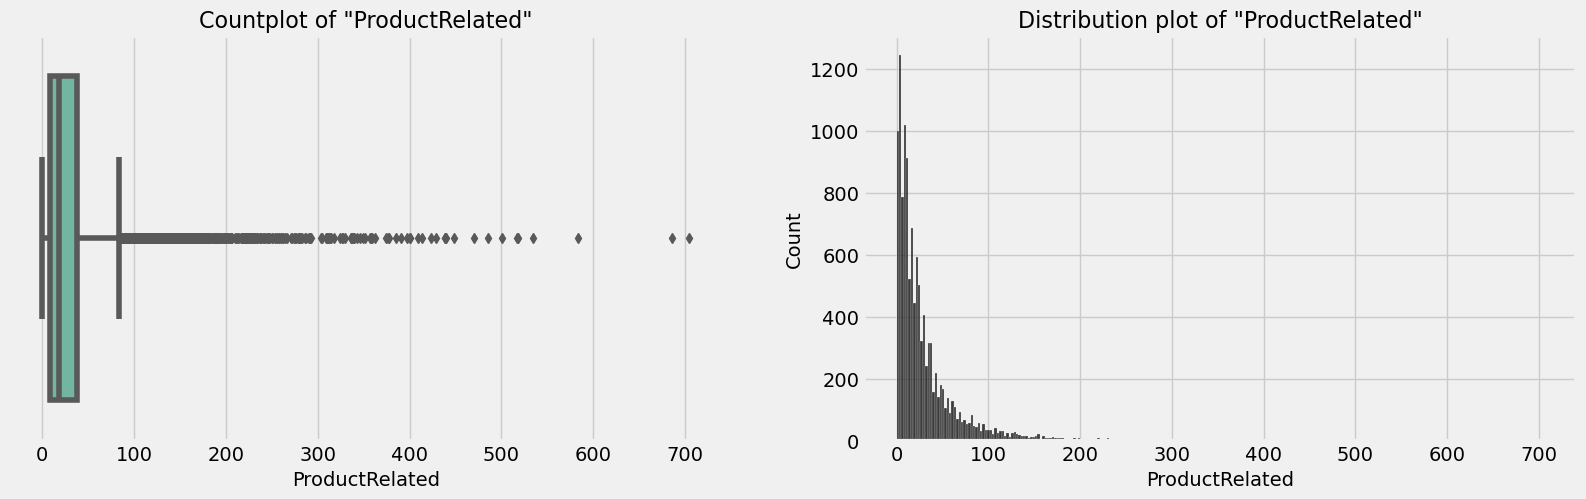

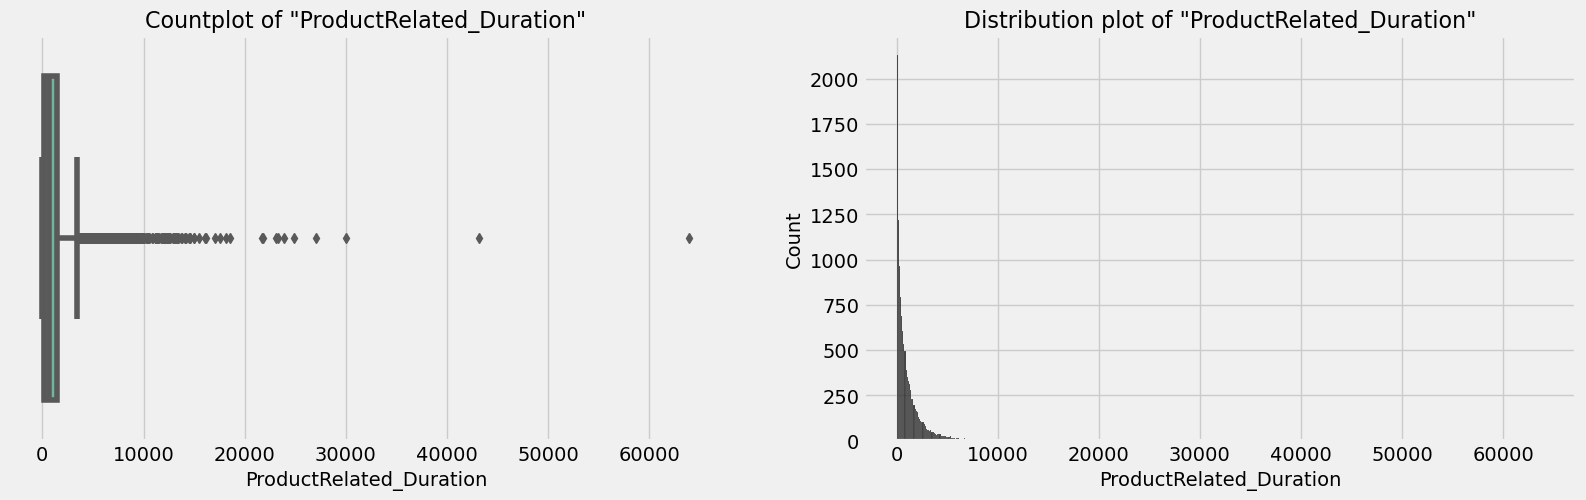

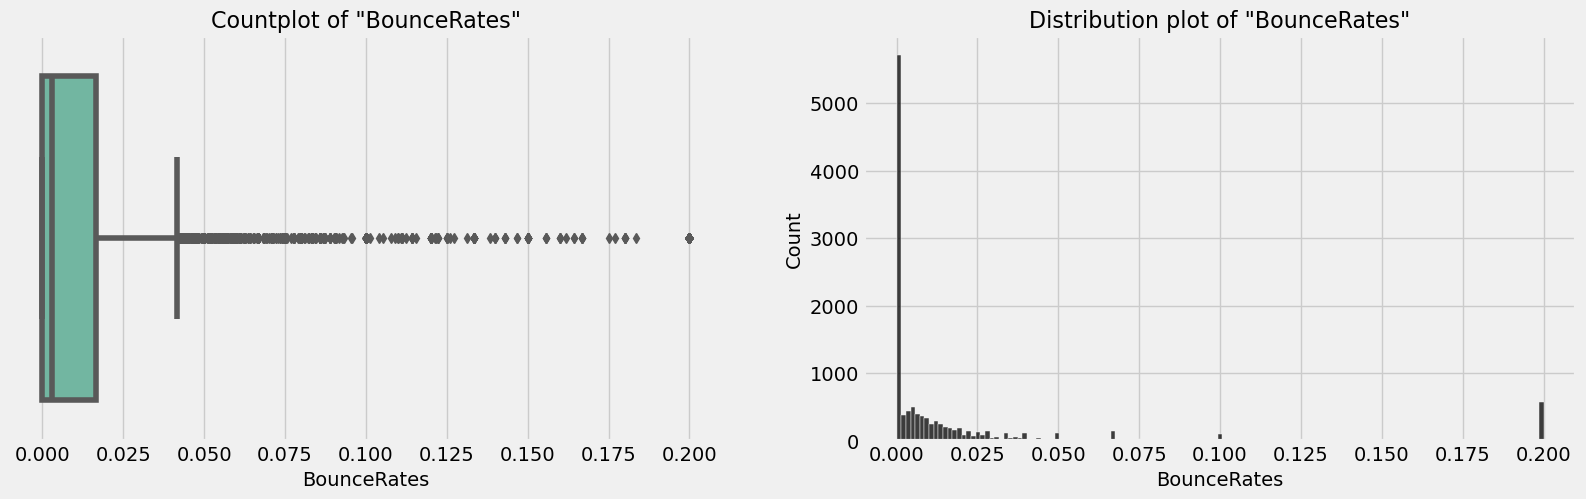

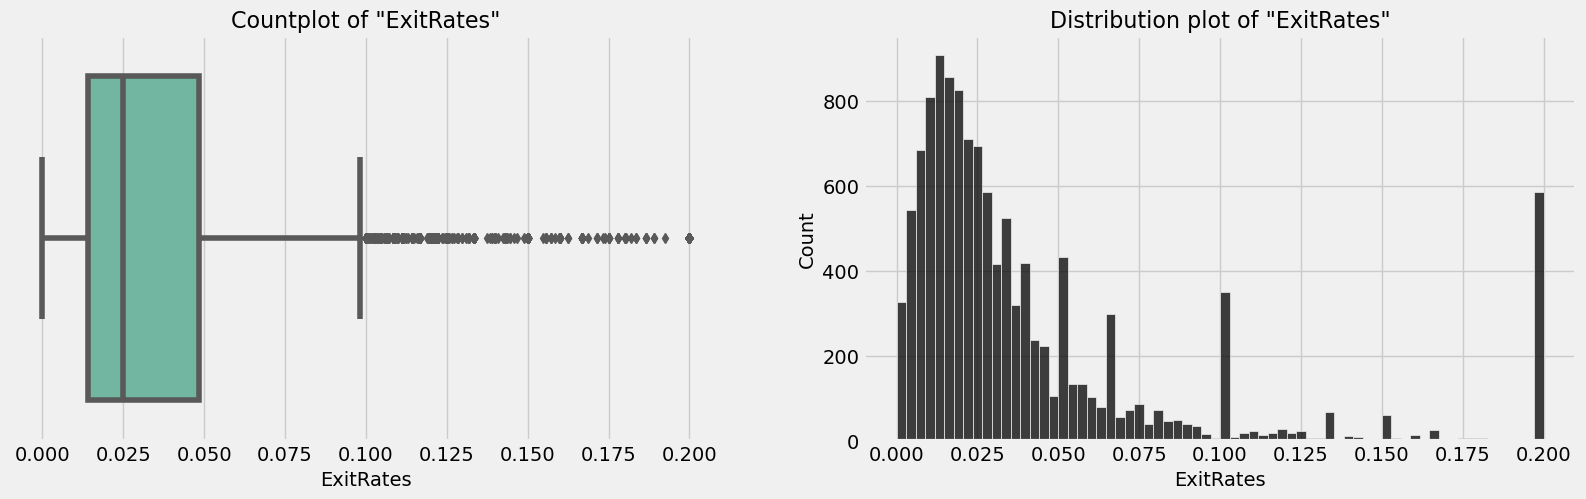

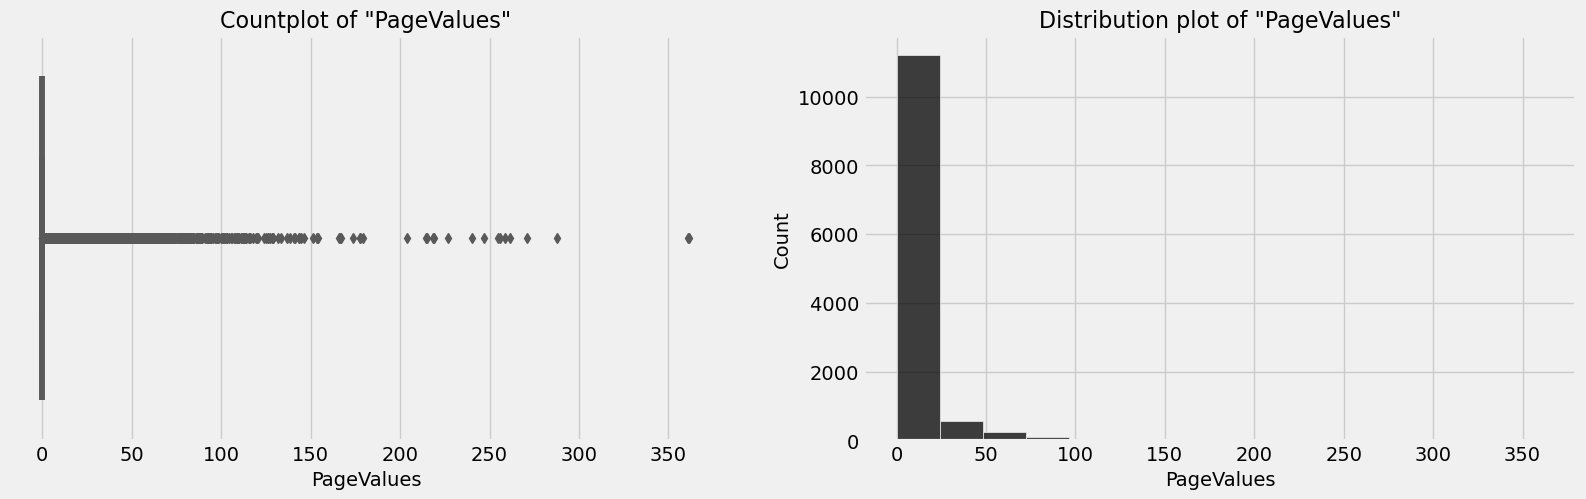

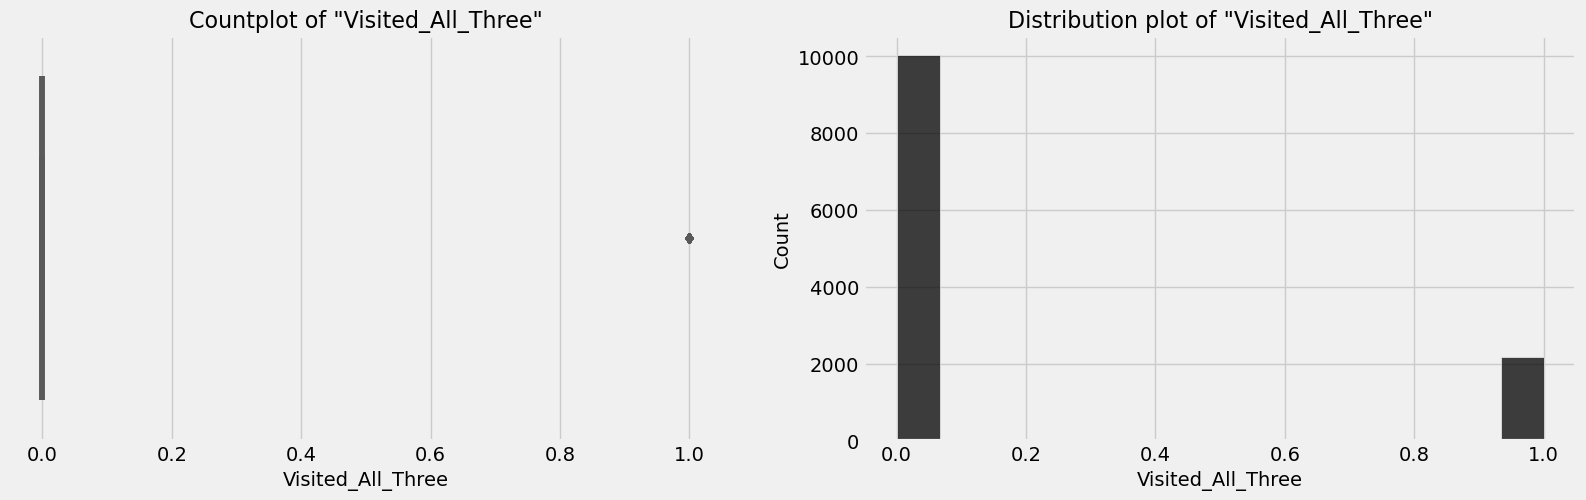

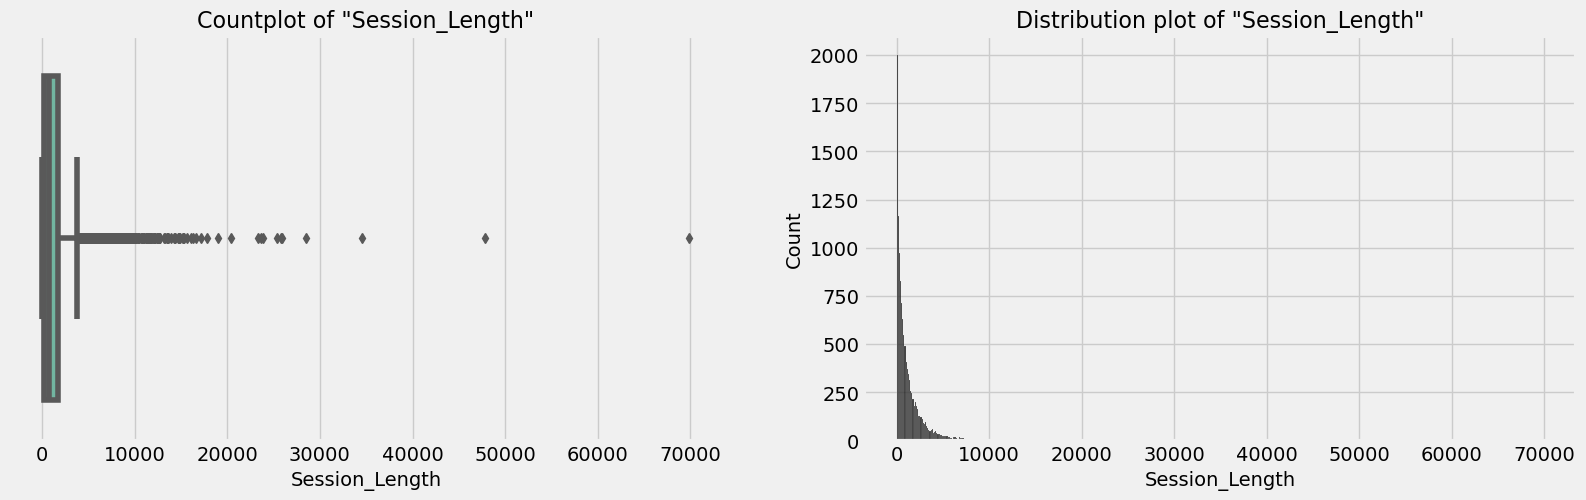

In [16]:
number_cols = df.select_dtypes(['int64','float64'])
for i in number_cols:
    plt.figure(figsize=(18, 5))

    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[i], palette='Set2')
    plt.title(f'Countplot of "{i}"', fontsize=16)

    plt.subplot(1, 2, 2)
    sns.histplot(x=df[i],multiple='stack',color='black')
    plt.title(f'Distribution plot of "{i}"', fontsize=16)
    plt.show()

# `DATA VISUALIZATION - CORRELATION ANALYSIS`

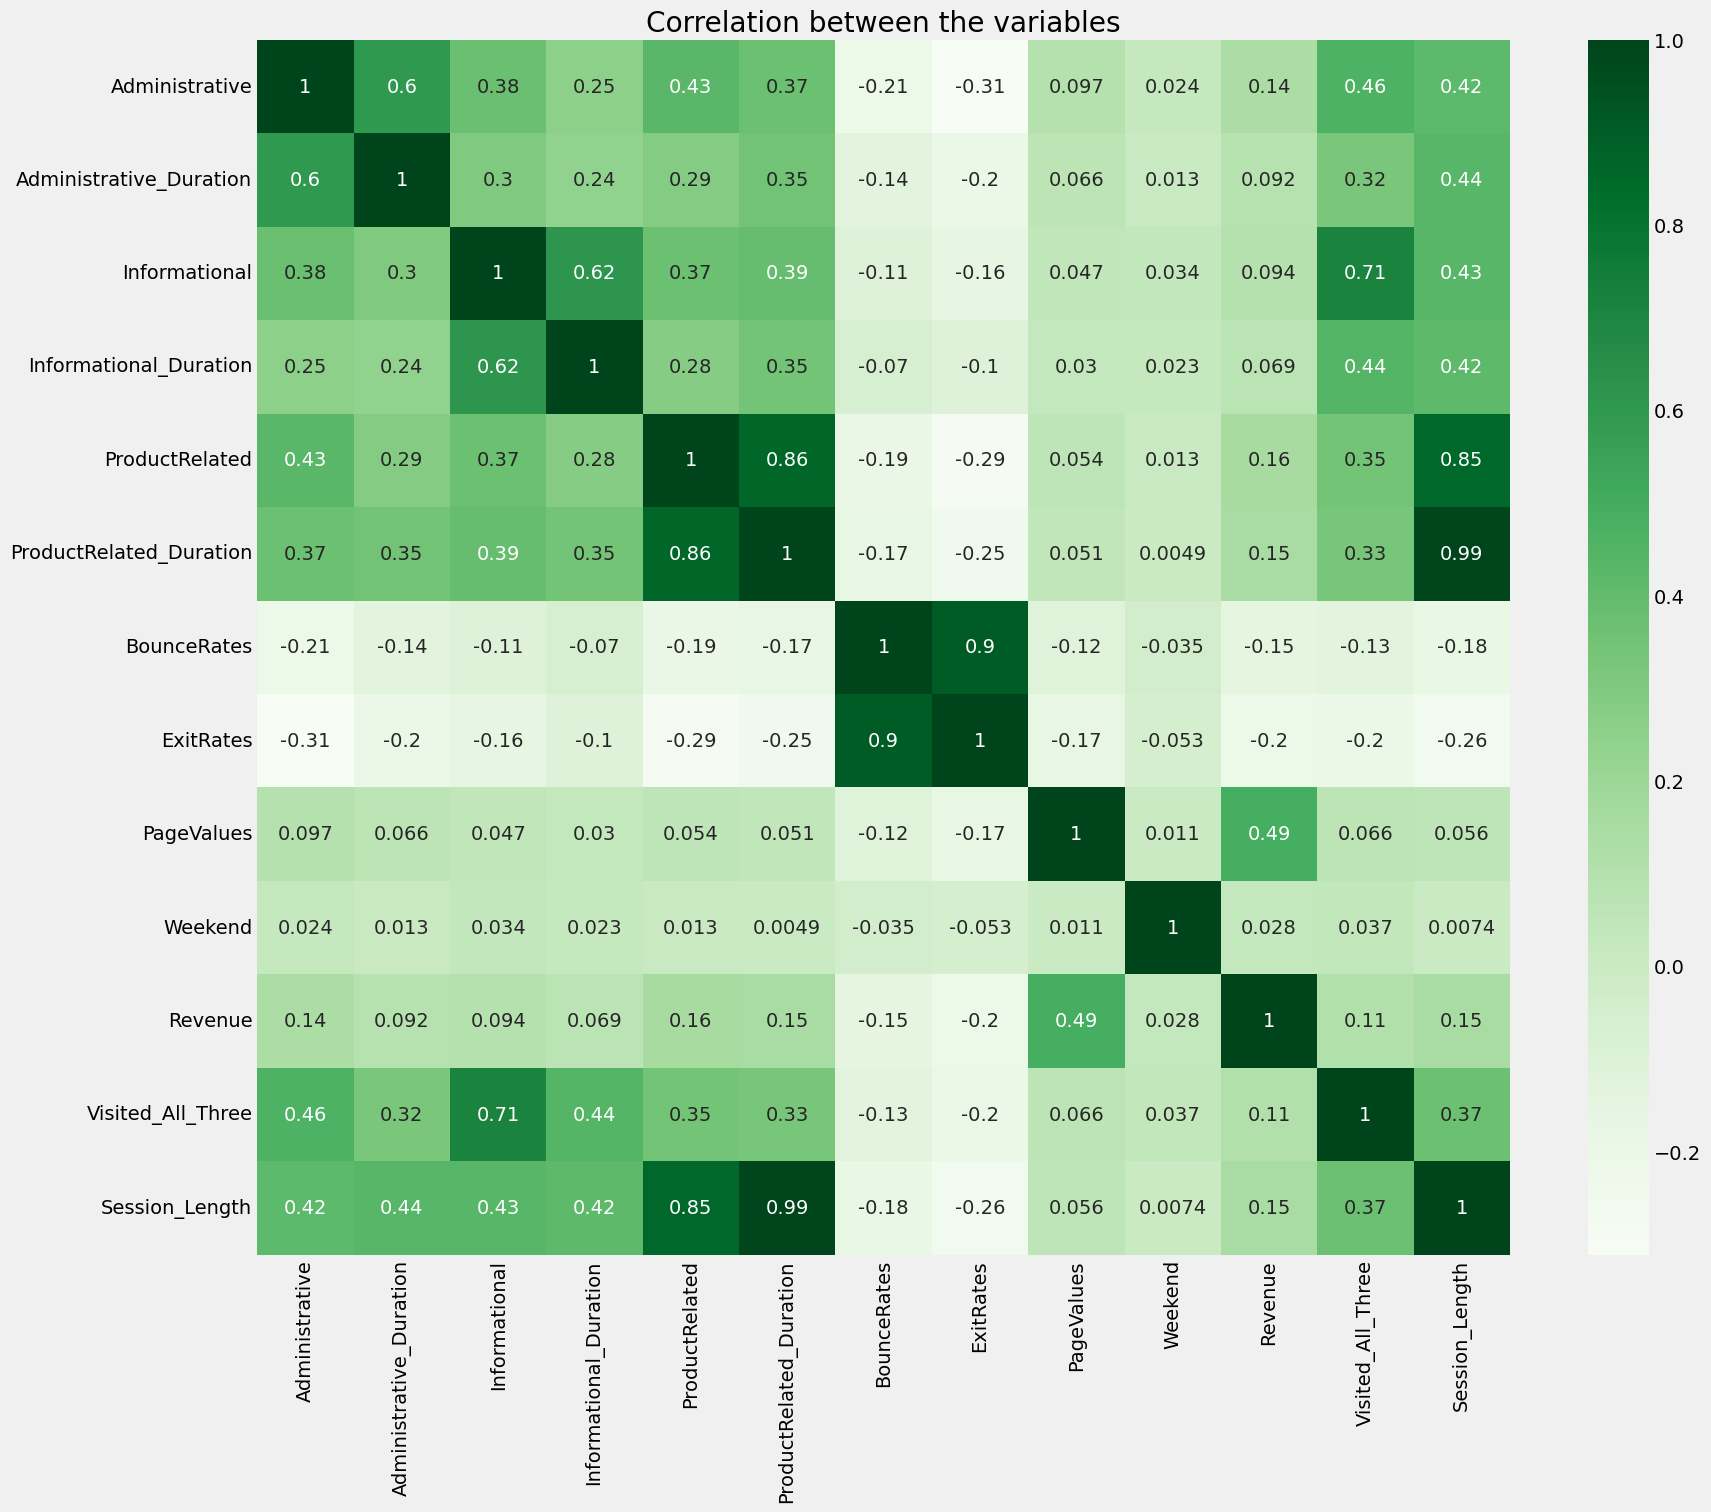

In [17]:
plt.figure(figsize=(18,15))
sns.heatmap(data=df.corr(),annot=True,cmap='Greens')
plt.title("Correlation between the variables")
plt.show()

## `CORRELATION BETWEEN VARIABLES:`

**A. ProductRelated (0.158538) and ProductRelated_Duration (0.162373) have a positive correlation with Revenue.** Users who visit more product-related pages or spend more time on them are more likely to make a purchase. You can explore user behavior on product-related pages to identify patterns that lead to higher conversion rates.


**B. PageValues (0.492569) has a strong positive correlation with Revenue.** Pages with higher values are associated with higher chances of purchase. Analyzing which pages have higher values and what content they feature can help in optimizing other pages to increase their value and, consequently, the conversion rate.


**C. BounceRates (0.913004) and ExitRates are highly correlated.** High BounceRates and ExitRates indicate pages where users are dropping off. Identifying and optimizing these pages can reduce bounce and exit rates, potentially increasing conversions.


**D. BounceRates (-0.150673) has a negative correlation with Revenue.** Pages with high bounce rates are less likely to lead to purchases. Focus on reducing bounce rates by improving user engagement on landing pages to increase the likelihood of conversions.


**E. ExitRates (-0.217071) has a negative correlation with Revenue.** Pages where users exit frequently are negatively impacting revenue. Identifying why users exit from these pages and addressing those issues can improve the user journey and increase sales.


**F. Administrative (0.138917) and Administrative_Duration (0.093587) have a positive correlation with Revenue.** Users interacting with administrative pages like account settings or order history may indicate serious intent to purchase. Enhancing user experience on these pages might help in retaining potential buyers.


**G. Informational (0.095200) and Informational_Duration (0.070345) have a positive correlation with Revenue.** Providing valuable informational content can contribute to user decisions to purchase. Improving the quality and accessibility of informational content might boost conversions.


**H. Weekend (0.029295) has a slight positive correlation with Revenue.** This suggests that there might be a slightly higher likelihood for revenue-generating transactions to occur on weekends compared to weekdays. 

**I. Session Length and Product Related Duration:** Highly correlated (0.99), indicating users spend more time on product-related pages.
Product Related and Product Related Duration: Also highly correlated (0.86), reinforcing engagement on product pages.
Moderate Relationships:

**J. Administrative and Administrative Duration:** Positive correlation (0.60), suggesting longer time spent on administrative pages.
Informational and Informational Duration: Positive correlation (0.62), indicating more time spent on informational pages.
Impact on Revenue:

**K.Page Values and Revenue:** Moderate positive correlation (0.49), implying higher page values correlate with higher revenue.

**L. Bounce Rates and Exit Rates:** Negative correlation with revenue (-0.15 and -0.21 respectively), highlighting their impact on transaction completion.


**M. Visited All Three and Session Length:** Positive correlation (0.37), indicating users who visit all page types spend more time on the site.
Bounce Rates and Exit Rates: Strong positive correlation (0.91), showing pages with higher bounce rates tend to have higher exit rates.

## `MULTICOLLINEARITY BETWEEN VARIABLES:`

**High Positive Multicollinearity:**  Particularly strong correlations are observed between ProductRelated and ProductRelated_Duration (0.860927), and between BounceRates and ExitRates (0.913004). This suggests that these pairs of variables measure very similar aspects of user behavior and could be redundant in models.

**High Negative Multicollinearity:** Strong negative correlations such as between BounceRates and Administrative (-0.223563), and ExitRates and ProductRelated (-0.292526) suggest that as users engage more with administrative or product pages, their likelihood to bounce or exit decreases, respectively.

## `DATA VISUALIZATION: SUMMARIZING KEY METRICES`

**`Key Metrices in the dataset:`** 

**Revenue:** Revenue is the primary indicator of the business's financial success, reflecting the monetary gain from user transactions. It directly affects the company's profitability, providing a clear measure of performance and helping to guide strategic decisions.

**PageValues:** PageValues indicates the monetary value of a page based on its contribution to a transaction, helping to identify key pages in the user journey. Understanding PageValues helps prioritize optimization efforts on high-value pages, potentially increasing overall revenue by enhancing the effectiveness of key pages.

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.scatterplot(x='PageValues',y='Administrative',data=df,hue='Revenue',palette='Set2')
plt.title('Adminsitrative vs PageValues with Revenue')
plt.subplot(1,3,2)
sns.scatterplot(x='PageValues',y='Informational',data=df,hue='Revenue',palette='Set2')
plt.title('Informational vs PageValues with Revenue')
plt.subplot(1,3,3)
sns.scatterplot(x='PageValues',y='ProductRelated',data=df,hue='Revenue',palette='Set2')
plt.title('ProductReleted vs PageValues with Revenue')
plt.show()

**`Observation:`** 

- As the number of Administrative, Informational, and ProductRelated pages viewed increases, the Page Value decreases.
- Users who view fewer Informational and ProductRelated pages tend to have higher Page Values and are more likely to generate revenue.

**`Insight:`** 

- Efficiently guiding users to essential content on fewer pages can enhance user experience and increase the likelihood of completing transactions.
- Users navigating through many pages might not find what they are looking for, leading to lower engagement and potential revenue loss.

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.scatterplot(x='PageValues',y='BounceRates',data=df,hue='Revenue',palette='Set2')
plt.title('Scatterplot for BounceRates vs PageValues with Respect to Revenue')
plt.subplot(1,2,2)
sns.scatterplot(x='PageValues',y='ExitRates',data=df,hue='Revenue',palette='Set2')
plt.title('Scatterplot for ExitRates vs PageValues with Respect to Revenue')
plt.show()

**`Observations and Insights:`**

**Observation:** 

- Both Bounce Rates and Exit Rates show that when Page Values are minimal, these rates range from 0.0 to 0.20, and most users following this trend generate no revenue.

- As Page Values increase with low or medium bounce and exit rates, users tend to generate revenue.

**Insight:** 

- Users who engage more meaningfully with content, indicated by higher Page Values and lower bounce/exit rates, are more likely to complete purchases.
- High bounce and exit rates on low-value pages indicate that users are leaving before engaging deeply, resulting in no revenue.

In [ ]:
admin_group = df.groupby('Administrative')[['BounceRates', 'ExitRates']].mean().reset_index()
admin_group_melted = admin_group.melt(id_vars='Administrative', value_vars=['BounceRates', 'ExitRates'], var_name='RateType', value_name='MeanRate')

info_group = df.groupby('Informational')[['BounceRates', 'ExitRates']].mean().reset_index()
info_group_melted = info_group.melt(id_vars='Informational', value_vars=['BounceRates', 'ExitRates'], var_name='RateType', value_name='MeanRate')

fig, axs = plt.subplots(2, 1, figsize=(18, 10), sharey=True) 

sns.barplot(data=admin_group_melted, x='Administrative', y='MeanRate', hue='RateType', ax=axs[0], palette='Set2')
axs[0].set_title('Mean BounceRates and ExitRates for different Administrative pages')
axs[0].set_xlabel('Different Administrative Pages')
axs[0].set_ylabel('Average Rate')
axs[0].legend(loc='upper right')

sns.barplot(data=info_group_melted, x='Informational', y='MeanRate', hue='RateType', ax=axs[1], palette='Set2')
axs[1].set_title('Mean BounceRates and ExitRates for different Informational pages')
axs[1].set_xlabel('Different Informational Pages')
axs[1].set_ylabel('Average Rate')  
plt.tight_layout()
plt.show()

**`Crucial Observations and Insights:`**

**Observation:** 
- Bounce Rates decrease as the number of Administrative pages viewed increases, starting from 0 pages to  8 pages.
- Exit Rates generally decrease as the number of Informational pages viewed increases, from 0 pages to 32 pages, with some fluctuations.
- Bounce Rates decrease as the number of Informational pages viewed increases, from 0 pages to 8 pages, with slight fluctuations thereafter.

**Insight:** 

- Increased engagement with informational content correlates with lower exit rates, indicating that users who explore these pages are more likely to continue their session on the site.
- Users engaging more with administrative pages tend to have lower bounce rates, indicating deeper engagement.
- Increased engagement with administrative content correlates with lower exit rates, suggesting that users who explore these pages are less likely to leave the site.
- Users engaging more with informational pages tend to have lower bounce rates, suggesting that informational content holds their interest.

**Patterns:**

- Bounce Rates decrease as the number of Administrative pages viewed increases, starting from  0 pages till 8 pages. Similarly, Bounce Rates decrease as the number of Informational pages viewed increases, from 0 pages till 8 pages, with slight fluctuations thereafter.

## `DATA VISUALIZATION: SPECIALDAY ANALYSIS`

In [ ]:
plt.figure(figsize=(20, 5))

# Pie chart for SpecialDay distribution
plt.subplot(1, 2, 1)
special_day_counts = df['SpecialDay'].value_counts()
plt.pie(special_day_counts, labels=special_day_counts.index, autopct='%1.1f%%', startangle=30, colors=sns.color_palette('Set2'))
plt.title('Distribution of SpecialDay Values')

# Stacked bar chart for SpecialDay by Revenue
plt.subplot(1, 2, 2)
specialday_revenue = pd.crosstab(df['SpecialDay'], df['Revenue'])
specialday_revenue_pct = specialday_revenue.div(specialday_revenue.sum(axis=1), axis=0)

# Plotting directly on the subplot
ax = plt.gca()
specialday_revenue_pct.plot(kind='bar', stacked=True, colormap='Set2', ax=ax)

plt.title('Percentage of SpecialDay by Revenue')
plt.xlabel('SpecialDay')
plt.ylabel('Percentage')
plt.legend(title='Revenue', loc='upper right')

plt.tight_layout()
plt.show()

**`Observations and Insights:`**

**Observations:**

- The majority of visits (11079) are not near a special day, as indicated by the 0.0 value.
- There are significantly fewer visits on or near special days, with 351 visits at 0.6, 325 visits at 0.8, 243 visits at 0.4, 178 visits at 0.2, and 154 visits at 1.0.

**Insight:**

- The overwhelming majority of user visits are not influenced by proximity to special days, which suggests that regular days constitute the bulk of traffic.
- The spike in visits at 0.6 and 0.8 could indicate that users are planning or preparing for the special day rather than making last-minute decisions, which reflects strategic user behavior around special days.
- The highest revenue conversion rate is seen on regular days (0.0 value), where 16.53% of visits result in revenue, indicating that most transactions occur on regular days.
- Revenue conversion rates drop significantly for all special day values, suggesting that visits closer to special days are less likely to result in purchases.
- The revenue conversion rate of 8.26% at a SpecialDay value of 0.6 and 7.87% at 0.2 suggests a slight increase in conversions as the special day approaches, but the overall impact on revenue generation remains lower compared to regular days.

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.stripplot(y=df['Session_Length'],x=df['SpecialDay'],hue=df['Revenue'],palette='Set2')
plt.subplot(1,2,2)
sns.stripplot(y=df['Session_Length'],x=df['SpecialDay'],hue=df['Weekend'],palette='Set2')
plt.show()

**`Observations and Insights`**:

**Observation:** Users who spend more time browsing the website are more likely to generate revenue primarily on regular days (0.0 SpecialDay). However, a small number of users also make purchases on other special days, though this is significantly less common.

**Insights:**

- Extended browsing time on regular days (0.0 SpecialDay) correlates with higher revenue generation, indicating that users are more engaged and likely to purchase on these days.
- The lower purchase rates on special days suggest that while some users do buy, the overall engagement and conversion are reduced compared to regular days.


## `DATA VISUALIZATION: BEHAVIOUR & CONVERSION RATE ANALYSIS`

In [ ]:
grouped_cols = ['TrafficType', 'VisitorType', 'Region']

for i in grouped_cols:
    plt.figure(figsize=(20, 5))  # Fix typo: plt.fugure -> plt.figure
    grouped_revenue = pd.crosstab(df[i], df['Revenue'])
    grouped_revenue_data = grouped_revenue.div(grouped_revenue.sum(axis=1), axis=0)  # Fix incorrect variable name

    # Plotting directly on the subplot
    ax = plt.gca()
    grouped_revenue_data.plot(kind='bar', stacked=True, colormap='Set2', ax=ax)

    plt.title(f'Percentage of Revenue by {i}')
    plt.xlabel(i)
    plt.ylabel('Percentage')
    plt.legend(title='Revenue', loc='upper right')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

**`Observations and Insights: TrafficType and Revenue`**

**Observations:**

- TrafficType 7, 8, and 16 have the highest conversion rates, with 30%, 27.7%, and 33.3% respectively.
- TrafficType 2 and 5 also show relatively high conversion rates of 21.7% and 21.5%.
- TrafficType 12, 15, 17, and 18 have no conversions, with a 0% conversion rate.

**Insights:**

- Specific traffic sources (7, 8, 16) are more effective in generating revenue, indicating higher user engagement and conversion likelihood.
- Certain traffic sources (12, 15, 17, 18) fail to convert, suggesting a need for strategy reassessment or improved targeting.

**`Observations and Insights: VisitorType and Revenue`**

**Observations:**

- New_Visitor has a conversion rate of 24.9%.
Other  Visitors has a higher conversion rate than Returning_Visitor.
Insights:

- New visitors have the highest conversion rate, indicating effective attraction and engagement strategies for first-time users.
- The 'Other' visitor type has a moderate conversion rate, suggesting potential for targeted improvements.
- Returning visitors, despite being familiar with the site, have the lowest conversion rate, highlighting a need to enhance retention and re-engagement strategies.

**`Observations and Insights: Region and Revenue`**

**Observations:**

- Region 2 and Region 9 have the highest conversion rates.
- Regions 6 and 8 have the lowest conversion rates.
- Other regions show conversion rates ranging from approximately 14.7% to 16.4%.

**Insights:** 

- Regions 2 and 9 exhibit the highest conversion rates, indicating strong engagement and sales strategies in these areas.
- Regions 6 and 8 have the lowest conversion rates, suggesting opportunities for targeted improvements in these regions.

In [ ]:
Admistrative_to_info = len(df[(df['Administrative'] > 0) & (df['Informational'] > 0) & (df['Revenue'] == True)])
Info_to_Product = len(df[(df['Administrative'] > 0) & (df['Informational'] > 0) & (df['ProductRelated'] > 0) & (df['Revenue'] == True)])

Total_Administrative = len(df[df['Administrative'] > 0])
Total_Informational = len(df[df['Informational'] > 0])
Total_ProductRelated = len(df[df['ProductRelated'] > 0])

Conversion_Adm_to_Info = Admistrative_to_info / Total_Administrative
Conversion_Info_to_Product = Info_to_Product / Total_Informational

print(f"Conversion rate from Administrative to Informational: {Conversion_Adm_to_Info:.2%}")
print(f"Conversion rate from Informational to Product Related: {Conversion_Info_to_Product:.2%}")
steps = ['Administrative', 'Informational', 'Product Related']
conversion_rates = [1, Conversion_Adm_to_Info, Conversion_Info_to_Product]  # Assuming 100% start at Administrative

# Step 3: Plotting the funnel chart
plt.figure(figsize=(15, 5))
plt.plot(steps, conversion_rates, marker='o', linestyle='-', color='b', linewidth=2)
plt.fill_between(steps, conversion_rates, color='skyblue', alpha=0.4)
plt.xlabel('Steps in Conversion Funnel')
plt.ylabel('Conversion Rate')
plt.title('Conversion Funnel Analysis')
plt.ylim(0, 1)  # Ensure y-axis shows 0% to 100%
plt.grid()
plt.tight_layout()
plt.show()


### `Conversion rate from Administrative to Informational: 8.02%.`

**Possible Reasons for Low Conversion from Adminstrative to Informational :**
 
**a.** Users on administrative pages often have specific tasks (e.g., account settings), limiting their need to explore informational content. Also, administrative pages meet immediate needs, reducing the incentive to explore further informational content.

**b.** Users may expect quick interactions on administrative pages, not prolonged engagement with informational content or if informational content isn't easily accessible, users may overlook its value.

### `Conversion rate from Administrative to Informational: 19.99%`

**a.** Users who engage with informational content are likely more informed and interested, increasing their likelihood of exploring product-related pages.

**b.** Effective content on informational pages can influence users to explore related products, leveraging their interest generated by informative content.

**c.** Informational pages often provide detailed product specifications, reviews, or comparisons that aid in decision-making, nudging users towards purchase completion.

In [ ]:
total_visits = df.shape[0]
visited_all_three = len(df[df['Visited_All_Three'] == 1])
completed_purchase = len(df[(df['Revenue'] == 0) & (df['Visited_All_Three'] == 1)])

funnel_stages = ['Visited Site', 'Visit all three', 'Completed purchase']
funnel_counts = [total_visits, visited_all_three, completed_purchase]
colors = ['skyblue', 'lightgreen', 'lightcoral']
# Create Plotly figure for the funnel plot
fig = go.Figure(go.Funnel(
    y=funnel_stages,
    x=funnel_counts,
    textinfo='value+percent initial',
    marker={
        'color': colors}
))

fig.update_layout(
    title='Conversion Funnel Analysis',
    xaxis_title='Number of Users',
    yaxis_title='Funnel Stage',
)

fig.show()

**`Insights:`**

- The fact that 2,167 users visited all three page types (Administrative, Informational, and ProductRelated) out of 12,205 total visits indicates a significant engagement level. This suggests that users are exploring various aspects of the website, possibly indicating strong interest or thorough research behavior.

- With 1,641 completed purchases out of the 2,167 users who visited all three page types, there's a notable conversion rate of approximately 75.7%. This high conversion rate among users who engage deeply with the content highlights the effectiveness of the website in converting interested visitors into customers.

- The overall conversion rate across all visits is around 13.4%, indicating that while engaged users are likely to convert, a significant portion of visitors who do not engage deeply with all three page types might not convert. 

**`Optimization Opportunities:`**

- There may be opportunities to optimize user journeys from initial visit to complete purchase. This could involve improving navigation between page types, enhancing content relevance, or offering targeted incentives based on user behavior across different page categories.

**`Strategic Insights:`**

- Focus on retaining and converting users who engage deeply with multiple page types by enhancing their experience and providing seamless pathways to purchase.
- Explore ways to increase engagement and reduce friction for users who do not explore all three page types, potentially through personalized recommendations or incentives.

# `DATA MINING AND DATA ANALYSIS`

## `REVENUE PATTERNS`

In [ ]:
cols= ['SpecialDay','Month','OperatingSystems','Browser','VisitorType','Weekend','Visited_All_Three']
for i in cols:
    plt.figure(figsize=(15,4))
    sns.countplot(x=df[i],palette='Set2',hue=df['Revenue'])
    plt.show()

**`Insights:`**

- Days marked as special (0.2, 0.4, 0.6, 0.8, 1.0) generally have fewer sessions compared to non-special days (0.0).
- Non-revenue sessions across different SpecialDay values follow a similar decreasing trend as the SpecialDay value increases, suggesting users might be less active on special days in general.

- Months like May and November consistently show higher overall sessions and revenue sessions compared to other months whereas Months such as July and June show moderate activity but lower revenue sessions compared to their session counts, indicating variability in conversion rates or customer behavior during these months also February stands out with the lowest number of revenue sessions.

- Operating System 2 consistently has the highest number of sessions for both revenue and non-revenue categories. This indicates a dominant user base using OS 2 across the dataset whereas Operating Systems 5, 6, and 7 have very low activity with minimal impact on revenue sessions suggesting that these less common operating systems might not significantly contribute to revenue generation in this dataset.

- While Browser 2 has the highest session counts, other browsers like Browser 1 and Browser 4 show varying levels of conversion rates whereas Browsers such as 3, 9, and 11 exhibit minimal activity with very few revenue sessions which implies that these less commonly used browsers do not significantly contribute to revenue generation in this dataset.

- Returning_Visitor category exhibits a much higher engagement level, indicating that returning visitors are more likely to convert to revenue sessions compared to new visitors and other categories. This suggests that efforts to retain and engage returning visitors could be more beneficial for increasing revenue.

# `SESSION_LENGTH`

In [ ]:
plt.figure(figsize=(15,5))
sns.lmplot(x='Session_Length', y='ProductRelated_Duration', hue='Month', data=df, palette='Set2', aspect=2)
plt.title('Relationship of Regression between Product Related Duration and Session Length with respect to Months')
sns.despine()
plt.show()

**`Insights:`**

- Session length has a strong positive correlation (0.85) with product-related duration, indicating that as users spend more time on the site, they tend to explore more product-related pages.

- User activity peaks in November and December, showing higher engagement and longer session lengths towards the end of the year.

- Each month exhibits a positive trend between session length and product-related duration, with March showing the highest likelihood of longer session lengths.

- The line for March appears longer and more visible than others, it suggests that in March, there may be a stronger or more distinct relationship between Session_Length and ProductRelated_Duration compared to other months. 

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.scatterplot(x=df['Session_Length'],y=df['PageValues'],hue=df['Visited_All_Three'],palette='Set2')
plt.title('Scatterplot of PageValues vs Session length with Visited All Three')
plt.subplot(1,2,2)
sns.scatterplot(x=df['Session_Length'],y=df['PageValues'],hue=df['Revenue'],palette='Set2')
plt.title('Scatterplot of PageValues vs Session length with Revenue')
plt.show()

**`Observations:`**

- Users who miss any of the three pages show diverse page value engagement, whereas complete page visitors more frequently result in revenue.

**`Insights:`**

- Users who engage with all three page types are more likely to generate revenue, indicating the importance of a comprehensive site experience.
- A complete interaction with all three page types correlates with higher revenue, highlighting the value of guiding users through a full site exploration.

In [ ]:
col_list = ['VisitorType', 'TrafficType', 'Region','Weekend','SpecialDay', 'Month', 'Visited_All_Three']
for i in col_list:
    plt.figure(figsize=(20, 10))
    plt.subplot(2,2, 1)
    sns.barplot(x=df[i], y=df['Session_Length'], hue=df['Revenue'], palette='Set1')
    plt.title(f'Session_Length by {i} and Revenue')
    plt.xticks(rotation=0)
    plt.tight_layout()
    
    plt.subplot(2, 2, 2)
    result = df.groupby([i, 'Revenue'])['Session_Length'].mean().reset_index()
    sns.lineplot(data=result, x=i, y='Session_Length', hue='Revenue', marker='o', palette='Set1')
    plt.title(f'Mean Session Length by {i} and Revenue')
    plt.xticks(rotation=0)
    plt.tight_layout()
    
    plt.subplot(2, 2, 3)
    sns.barplot(x=df[i], y=df['PageValues'], hue=df['Revenue'], palette='Set1')
    plt.title(f'PageValues by {i} and Revenue')
    plt.xticks(rotation=0)
    plt.tight_layout()

    plt.subplot(2, 2, 4)
    result = df.groupby([i, 'Revenue'])['PageValues'].mean().reset_index()
    sns.lineplot(data=result, x=i, y='PageValues', hue='Revenue', marker='o', palette='Set1')
    plt.title(f'Mean PageValues by {i} and Revenue')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()
    print("*"*127)

# `DATA ANALYSIS:`

**`VisitorType:`**

**Mean Session Length and Mean PageValues:**

- Revenue sessions across all visitor types tend to have longer mean session lengths and higher mean page values compared to non-revenue sessions.
- New Visitors show the lowest engagement (shorter mean sessions) and lower mean page values, especially in non-revenue sessions.
- Other Visitors show substantial engagement with higher mean session lengths and very high mean page values in revenue sessions.
- Returning Visitors exhibit longer mean sessions and moderate mean page values across revenue and non-revenue sessions.

**Overall Patterns:**

- There is a clear correlation between mean session length and mean page values across visitor types, with revenue sessions consistently showing higher values.
- Other Visitors stand out with significantly higher mean page values in revenue sessions, indicating more valuable interactions.
- New Visitors generally have shorter sessions and lower engagement, reflected in lower mean page values.

**`TrafficType:`**

**Mean Session Length and Mean PageValues:**

- Revenue sessions generally have longer mean session lengths and higher mean page values across different traffic types.
- TrafficType 2 and TrafficType 4 exhibit higher engagement (longer mean sessions) and higher mean page values when revenue is generated.
- TrafficType 5 shows consistently shorter mean sessions and lower mean page values regardless of revenue status.

**Overall Patterns:**

- Mean session length positively correlates with mean page values, indicating higher engagement leads to more valuable interactions.
- TrafficType 2 and TrafficType 4 show consistent patterns of longer mean sessions and higher mean page values in revenue-generating sessions.
- TrafficType 5 consistently shows shorter mean sessions and lower mean page values, suggesting less engagement overall.

**`Region:`** 

**Mean Session Length and Mean PageValues:**

- Revenue sessions generally have longer mean session lengths and higher mean page values across different regions.
- Some regions, like 5, 6, and 9, consistently show higher engagement metrics (mean session lengths and mean page values) in revenue sessions.
- Regions 1, 2, and 4 exhibit moderate engagement levels with relatively stable mean session lengths and mean page values across revenue and non-revenue sessions.

**Overall Patterns:**

- Regions with higher mean session lengths tend to also exhibit higher mean page values in revenue sessions.
- There is variability across regions, with some showing more significant differences in engagement metrics between revenue and non-revenue sessions.
- The data suggests that regional differences play a role in user engagement and revenue generation, with certain regions showing more lucrative interactions in terms of session length and page value.

**`Weekend:`**

**Mean Session Length and Mean PageValues:**

- Revenue sessions generally have longer mean session lengths and higher mean page values across both weekday and weekend categories.
- Weekends (True) exhibit higher engagement metrics (mean session lengths and mean page values) in revenue sessions compared to weekdays (False).

**Overall Patterns:**

- Weekends (True) are associated with higher engagement levels in terms of mean session length and mean page values for revenue-generating sessions.
- Weekdays (False) show more consistent but lower overall engagement metrics compared to weekends for revenue sessions.
- The data suggests that weekends are more conducive to longer user sessions and higher page values, potentially indicating higher conversion rates or engagement during leisure periods.

**`SpecialDay:`** 

**Mean Session Length and Mean PageValues:**

- Revenue sessions consistently exhibit longer mean session lengths and higher mean page values across various SpecialDay values.
- Special days (0.2, 0.4, 0.6, 0.8, 1.0) particularly show significantly longer mean session lengths and higher mean page values when revenue is generated compared to regular days (0.0).

**Overall Patterns:**

- Special days (0.2, 0.4, 0.6, 0.8, 1.0) correlate with higher engagement metrics (mean session length and mean page values) for revenue-generating sessions.
- Regular days (0.0) maintain more consistent but generally lower engagement levels compared to special days in revenue sessions.
- The data suggests that special days encourage longer user sessions and higher page values, potentially indicating enhanced conversion rates or engagement during these periods.

**`Visited_All_Three:`**

**Mean Session Length and Mean PageValues:**

- Revenue sessions consistently display higher mean session lengths and mean page values across different Visited_All_Three categories.
- Sessions where all three pages were visited (Visited_All_Three = 1) notably exhibit significantly longer mean session lengths and higher mean page values when revenue is generated compared to sessions where not all three pages were visited (Visited_All_Three = 0).

**Overall Patterns:**

- Sessions where all three pages were visited (Visited_All_Three = 1) are associated with higher engagement metrics (mean session length and mean page values) for revenue-generating sessions.
- Sessions with not all three pages visited (Visited_All_Three = 0) generally show lower engagement levels compared to sessions with all pages visited in terms of revenue sessions.
- This pattern suggests that comprehensive user interaction across all specified pages enhances session length and page value, potentially leading to higher conversion rates or engagement.


**`Month:`** 

**Mean Session Length and Mean PageValues:**

- Revenue sessions consistently demonstrate higher mean session lengths and mean page values across different months.
- Months with revenue (True) notably show significantly longer mean session lengths and higher mean page values compared to months without revenue (False).
- Seasonal trends influence engagement levels, with certain months showing peaks in user interaction and transactional activity.

**Overall Patterns:**

- Months with revenue (True) are associated with higher engagement metrics (mean session length and mean page values) compared to months without revenue (False).
- This pattern suggests seasonal variations or specific months influencing user engagement and transactional activity, potentially aligning with promotional periods or seasonal trends in consumer behavior.